In [54]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples,silhouette_score, calinski_harabasz_score
from sklearn.pipeline import Pipeline
import matplotlib.cm as cm

from ipywidgets import interact
import ipywidgets as widgets

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [17]:
# TASK 1
df = pd.read_csv('cards.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [18]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [19]:
df1 = df.dropna()
df1 = df1.drop(['CUST_ID'],axis = 1)
df1.shape

(8636, 17)

Here, scaling is needed because the range of values is different for different dimensions.

In [20]:
model = StandardScaler()
df_scaled = model.fit_transform(df1)
df_std = pd.DataFrame(df_scaled, columns=df1.columns)
df_std

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,-0.761342,-1.902089,-0.463563,-0.346751,-0.458839,-0.468655,-0.820769,-0.130790,-0.926522,-0.681953,-0.479437,-0.557339,-1.099224,-0.593143,-0.345988,-0.537727,-4.221800
8632,-0.750546,0.505405,-0.338865,-0.359160,-0.141436,-0.468655,1.256077,-0.686280,1.166912,-0.681953,-0.479437,-0.358760,-0.962575,-0.501396,-0.343706,1.150015,-4.221800
8633,-0.752977,-0.297095,-0.406572,-0.359160,-0.301402,-0.468655,0.840707,-0.686280,0.748227,-0.681953,-0.479437,-0.398476,-0.962575,-0.585367,-0.329572,0.306144,-4.221800
8634,-0.757721,-0.297095,-0.473208,-0.359160,-0.458839,-0.451422,-1.236139,-0.686280,-0.926522,0.144032,-0.190089,-0.597054,-1.099224,-0.595238,-0.340811,0.306144,-4.221800


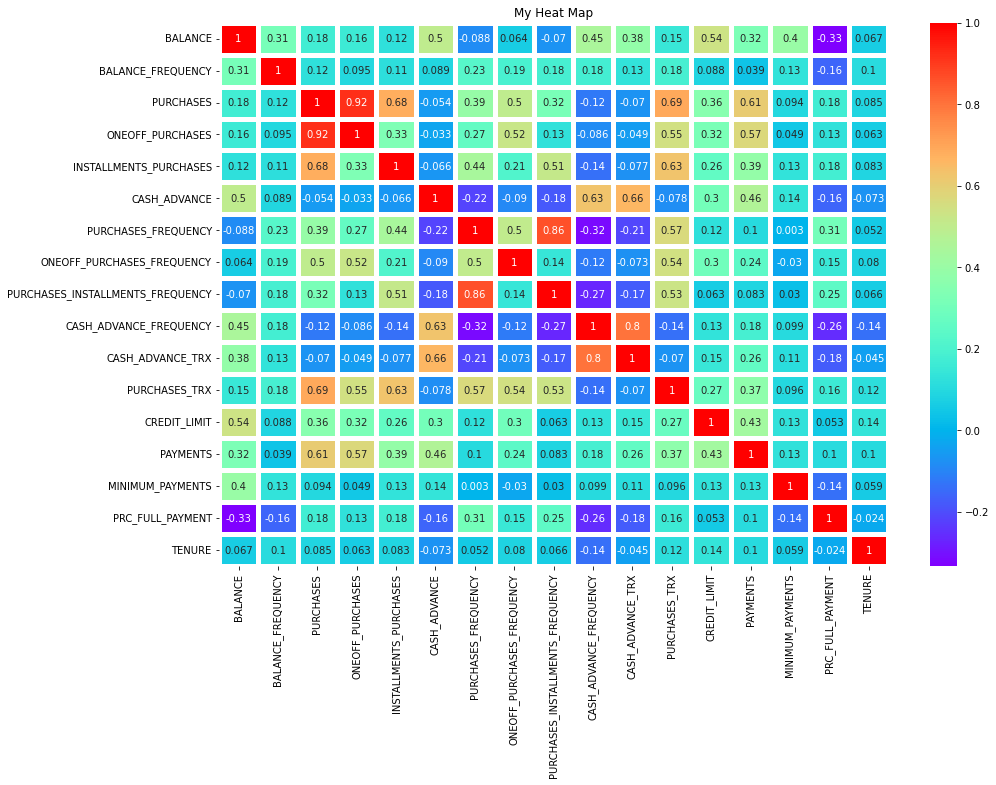

In [24]:
fig, ax=plt.subplots(figsize= (15,10))
sns.heatmap(df_std.corr(), cmap='rainbow', annot=True, linewidth=5).set_title('My Heat Map')
plt.show()

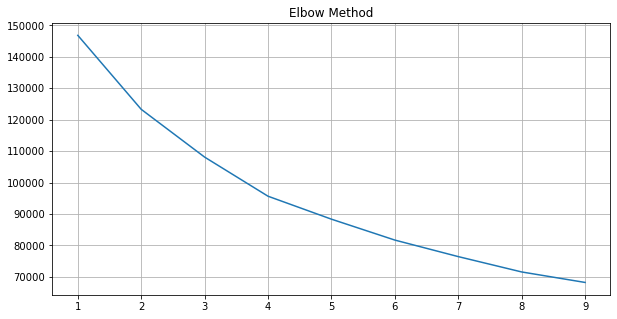

In [25]:
# TASK 2
distortion = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(df_std)
    distortion.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize = (10,5))
plt.plot(range(1,10), distortion)
plt.grid(True)
plt.title('Elbow Method')
plt.show()

From this elbow diagram K=4 is coming out to be the best parameter.

In [31]:
df_std.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

Centroids : 
 [[-0.24942845 -0.27040524]
 [ 3.4600083   3.70730661]
 [13.90360502 12.95362629]
 [ 0.85033206  0.96550089]]


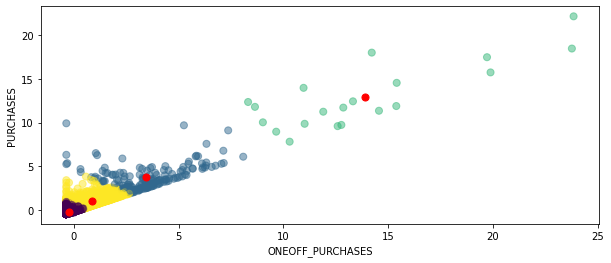

Centroids : 
 [[ 0.20181179  0.17679764]
 [-0.87878415 -1.015482  ]
 [ 1.33757964  1.16087342]
 [-0.74362862  0.73768152]]


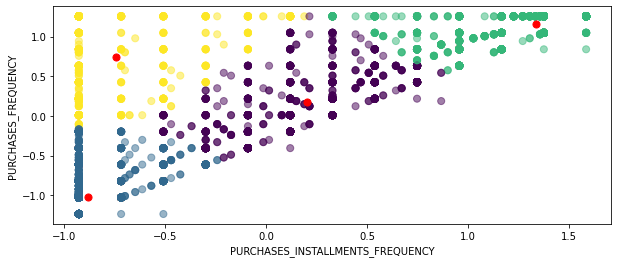

Centroids : 
 [[-0.59276447 -0.43670122]
 [ 2.23773521  1.80524012]
 [ 0.59903998  0.24880239]
 [ 3.269986    6.93837877]]


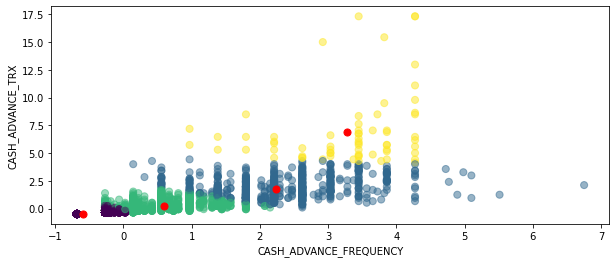

Centroids : 
 [[-0.34897032 -0.29462202]
 [ 3.92843617  2.65850419]
 [ 0.8829492   0.72048967]
 [ 4.51071986 12.50086935]]


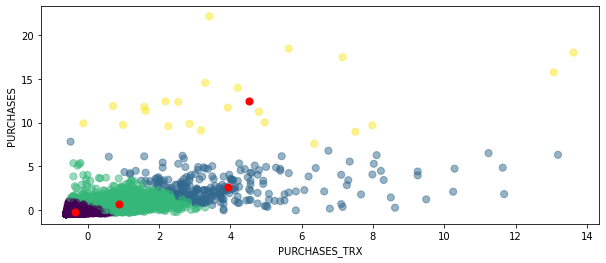

In [43]:
col1=['ONEOFF_PURCHASES','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PURCHASES_TRX']
col2=['PURCHASES','PURCHASES_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES']

for x, y in zip(col1,col2):
    kmeans = KMeans(n_clusters=4, n_init=4, random_state = 3).fit(df_std[[x,y]])
    centroids = kmeans.cluster_centers_
    cluster = kmeans.fit_predict(df_std[[x,y]])
    print('Centroids : \n',centroids)
    fig, ax = plt.subplots(figsize=(10,4))
    plt.scatter(df_std[x], df_std[y], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

Centroids : 
 [[-0.34897032 -0.29462202]
 [ 3.92843617  2.65850419]
 [ 0.8829492   0.72048967]
 [ 4.51071986 12.50086935]]


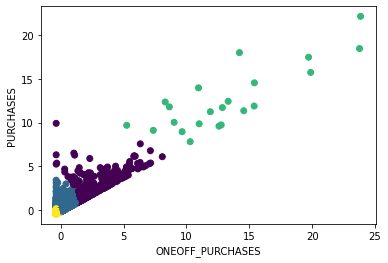

Centroids : 
 [[-0.34897032 -0.29462202]
 [ 3.92843617  2.65850419]
 [ 0.8829492   0.72048967]
 [ 4.51071986 12.50086935]]


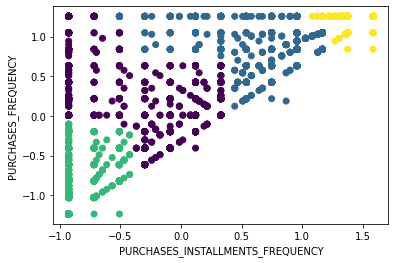

Centroids : 
 [[-0.34897032 -0.29462202]
 [ 3.92843617  2.65850419]
 [ 0.8829492   0.72048967]
 [ 4.51071986 12.50086935]]


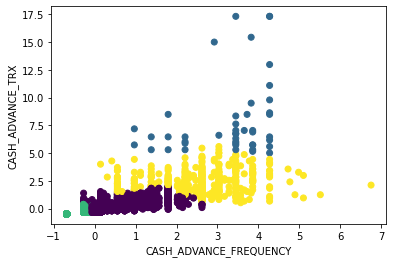

Centroids : 
 [[-0.34897032 -0.29462202]
 [ 3.92843617  2.65850419]
 [ 0.8829492   0.72048967]
 [ 4.51071986 12.50086935]]


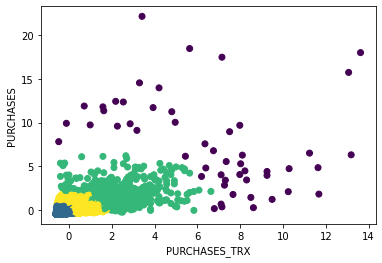

In [44]:
for x, y in zip(col1,col2):
    model = AgglomerativeClustering(n_clusters=4, linkage='ward')
    cluster = model.fit_predict(df_std[[x,y]])
    print('Centroids : \n',centroids)
    pred = model.fit_predict(df_std[[x,y]])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(df_std[x], df_std[y], c= pred)
    plt.show()

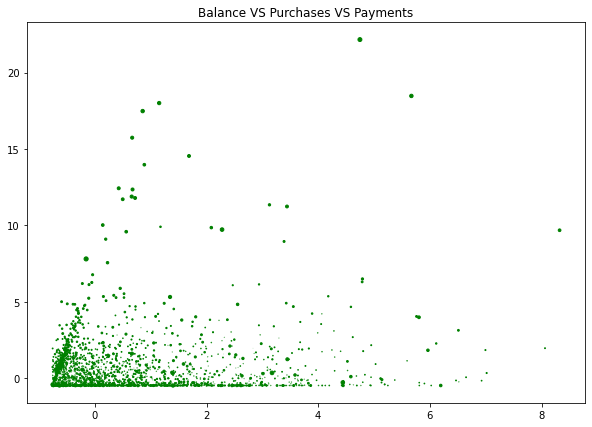

In [79]:
# TASK 3
fig = plt.figure(figsize = (10, 7))

plt.scatter(df_std['BALANCE'],df_std['PURCHASES'], df_std['PAYMENTS'], color = "green")
plt.title("Balance VS Purchases VS Payments")
plt.show()

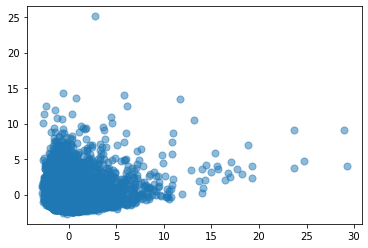

In [77]:
values1 = PCA(n_components = 2).fit_transform(df_std)
plt.scatter(values1[:,0], values1[:,1], s=50, alpha=0.5)
plt.show()

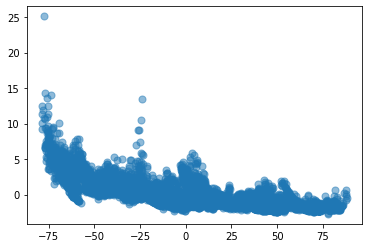

In [75]:
values2 = TSNE(n_components = 2).fit_transform(df_std)
plt.scatter(values2[:,0], values1[:,1], s=50, alpha=0.5)
plt.show()

Here I am prefering TSNE because the data points are uniformly distributed.

Centroids : 
 [[ 37.300804   -8.215853 ]
 [-48.478504   10.854498 ]
 [ -3.2004135 -49.648838 ]
 [ 18.232103   43.94223  ]]


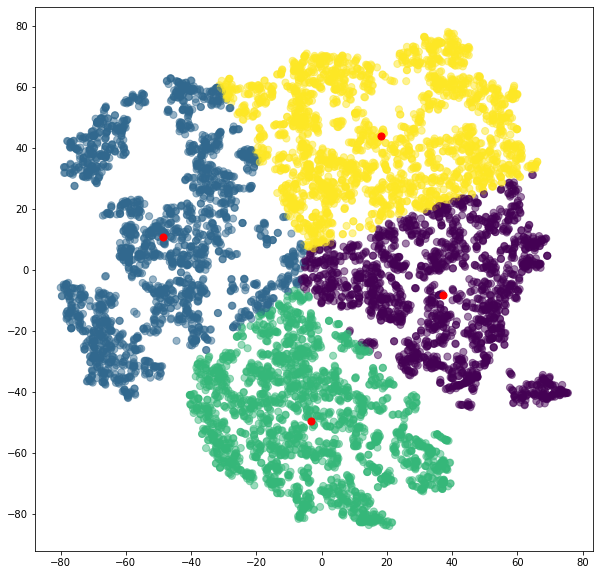

In [74]:
kmeans = KMeans(n_clusters=4, n_init=4, random_state = 3).fit(values2)
centroids = kmeans.cluster_centers_
cluster = kmeans.fit_predict(values2)
print('Centroids : \n',centroids)
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(values2[:,0], values2[:,1], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

Centroids : 
 [[ 37.300804   -8.215853 ]
 [-48.478504   10.854498 ]
 [ -3.2004135 -49.648838 ]
 [ 18.232103   43.94223  ]]


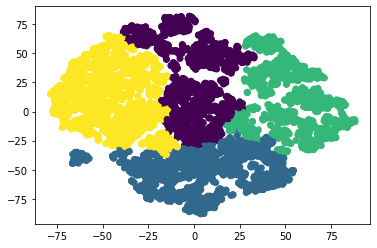

In [78]:
model = AgglomerativeClustering(n_clusters=4, linkage='ward')
cluster = model.fit_predict(values2)
print('Centroids : \n',centroids)
pred = model.fit_predict(values2)
plt.scatter(values2[:,0], values2[:,1], c= pred)
plt.show()

The clusters obtained after dimension reduction are quite different.

After dimension reduction, the runtime of clustering methods have decreased.